In [9]:
import sys
import os

sys.path.append(os.path.abspath('..'))

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.plotting import set_project_style

In [ ]:
# 시각화 관련 기본 설정
set_project_style()

Seaborn style and Korean font (Malgun Gothic) applied.


In [ ]:
# github 데이터셋
df_github = pd.read_csv('../dataset/github_all_years_cleaned.csv', encoding='utf-8')
df_github.head()

In [70]:
# ChatGPT 전후 비교에 대한 분야 나누기
grouped_data = df_github.groupby(['period', 'ai_field']).size()

grouped_df = grouped_data.reset_index(name='count')

print("\n== 그룹별 집계 데이터 확인 ==")
print(df_github['period'].value_counts())
print(grouped_df.head(len(grouped_df) if len(grouped_df) < 30 else 5))


== 그룹별 집계 데이터 확인 ==
period
After     1539213
Before     320293
Name: count, dtype: int64
    period         ai_field   count
0    After  Computer Vision    6907
1    After    Deep Learning  187075
2    After       General ML  281016
3    After              LLM  253748
4    After              NLP   14776
5    After           Others  795691
6   Before  Computer Vision    2362
7   Before    Deep Learning   78471
8   Before       General ML   94280
9   Before              LLM    2413
10  Before              NLP    3952
11  Before           Others  138815


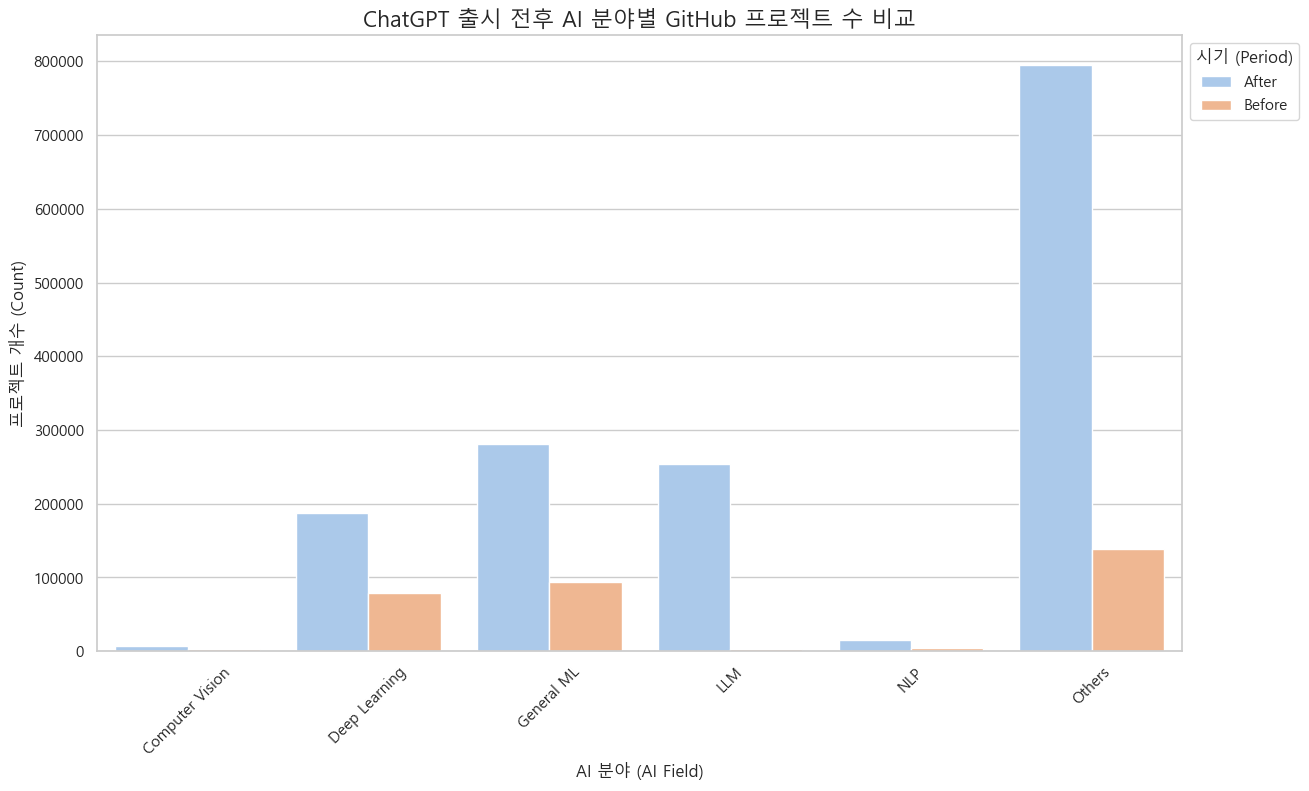

In [94]:
plt.figure(figsize=(14, 8))

sns.barplot(
    data=grouped_df, 
    x='ai_field', 
    y='count', 
    hue='period'
)

# 그래프 제목 및 라벨 설정
plt.title('ChatGPT 출시 전후 AI 분야별 GitHub 프로젝트 수 비교', fontsize=16)
plt.xlabel('AI 분야 (AI Field)', fontsize=12)
plt.ylabel('프로젝트 개수 (Count)', fontsize=12)
plt.legend(
        title='시기 (Period)',
        loc='upper left',
        bbox_to_anchor=(1, 1)
)
plt.xticks(rotation=45)

plt.show()

In [ ]:
# 'Others' 분야 데이터만 필터링
# df_github는 'period' 컬럼이 이미 생성된 상태여야 합니다
others_df = df_github[df_github['ai_field'] == 'Others']

print(f"--- 'Others' 분야 데이터 총 개수: {len(others_df)} ---")

In [ ]:
# 'Others' 내부의 키워드별, 시기별(Before/After) 개수 집계
# 'keyword'와 'period'를 기준으로 그룹화하고 개수를 셉니다
# (결측치(NaN) 키워드는 집계에서 제외합니다)
others_grouped = others_df.dropna(subset=['keyword']).groupby(['keyword', 'period']).size()

others_grouped_df = others_grouped.reset_index(name='count')

print("\n--- 'Others' 내부 키워드별 집계 ---")
print(others_grouped_df.head())

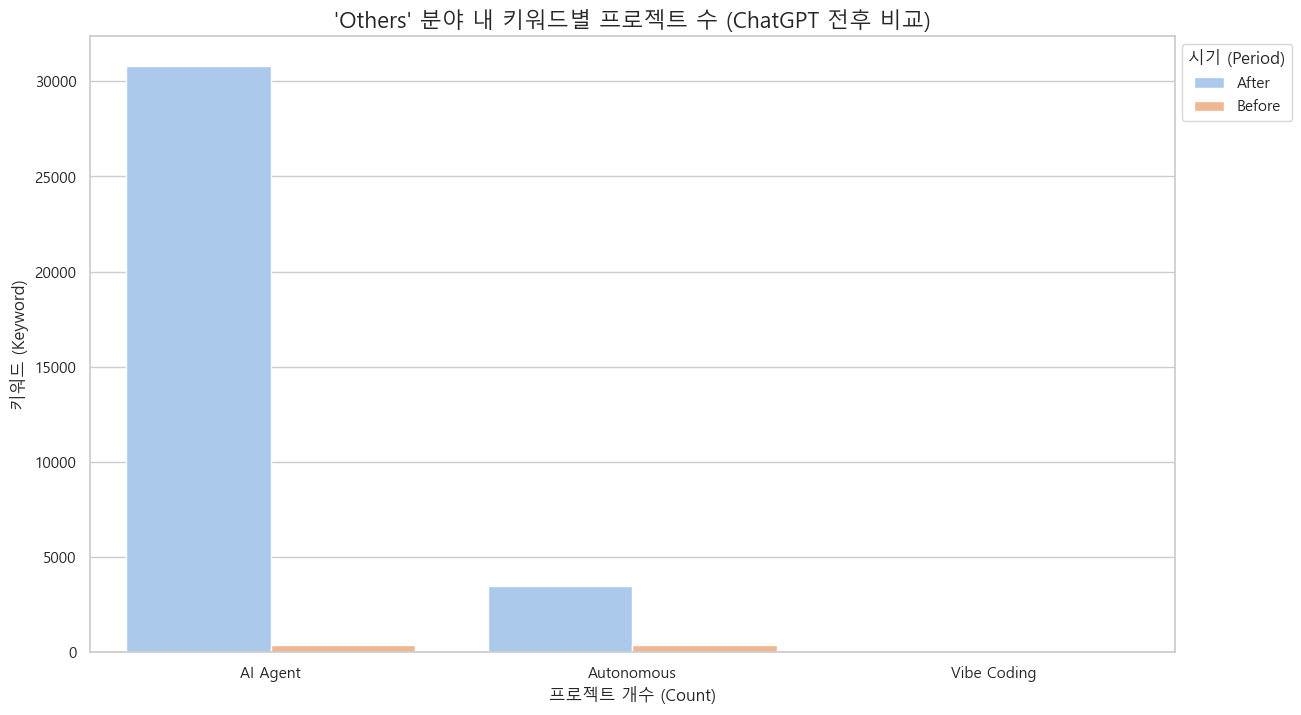


'Others' 중에서 키워드가 없는(NaN) 프로젝트 개수: 899343


In [95]:
plt.figure(figsize=(14, 8))

sns.barplot(
    data=others_grouped_df,
    x='keyword',
    y='count',
    hue='period'
)

plt.title("'Others' 분야 내 키워드별 프로젝트 수 (ChatGPT 전후 비교)", fontsize=16)
plt.xlabel('프로젝트 개수 (Count)', fontsize=12)
plt.ylabel('키워드 (Keyword)', fontsize=12)
plt.legend(
        title='시기 (Period)',
        loc='upper left',
        bbox_to_anchor=(1, 1)
)

plt.show()

# --- (참고) 'Others' 중 키워드가 없는 것들의 비율 ---
keyword_nan_count = others_df['keyword'].isna().sum()
print(f"\n'Others' 중에서 키워드가 없는(NaN) 프로젝트 개수: {keyword_nan_count}")

In [ ]:
# 'language' 컬럼의 결측치(NaN) 제거 및 Top 10 언어 찾기
# (언어 정보가 없는(NaN) 프로젝트는 분석에서 제외)
df_lang = df_github.dropna(subset=['language'])

# 'period'가 'Unknown'이 아닌 데이터만 사용
df_lang = df_lang[df_lang['period'] != 'Unknown']
df_lang = df_lang[df_lang['language'] != 'HTML']
df_lang = df_lang[df_lang['language'] != 'CSS']

# 가장 많이 등장한 언어 Top 10 리스트 뽑기
top_10_languages = df_lang['language'].value_counts().nlargest(10).index.tolist()

print(f"--- 가장 많이 사용된 언어 Top 10 ---")
print(top_10_languages)


--- 가장 많이 사용된 언어 Top 10 ---
['Jupyter Notebook', 'Python', 'JavaScript', 'TypeScript', 'Java', 'C++', 'R', 'C#', 'Go', 'MATLAB']


In [89]:
# Top 10 언어 데이터만 필터링 
df_top10_lang = df_lang[df_lang['language'].isin(top_10_languages)]

print("\n--- Top 10 언어 데이터로 필터링 완료 ---")


--- Top 10 언어 데이터로 필터링 완료 ---


In [90]:
# Top 10 언어별, 시기(time_period)별로 개수 집계
grouped_lang_data = df_top10_lang.groupby(['language', 'period']).size()
grouped_lang_df = grouped_lang_data.reset_index(name='count')

print("\n--- 언어별, 시기별 집계 완료 ---")
print(grouped_lang_df.head())


--- 언어별, 시기별 집계 완료 ---
  language  period  count
0       C#   After   7006
1       C#  Before   1657
2      C++   After   9292
3      C++  Before   2982
4       Go   After   7005


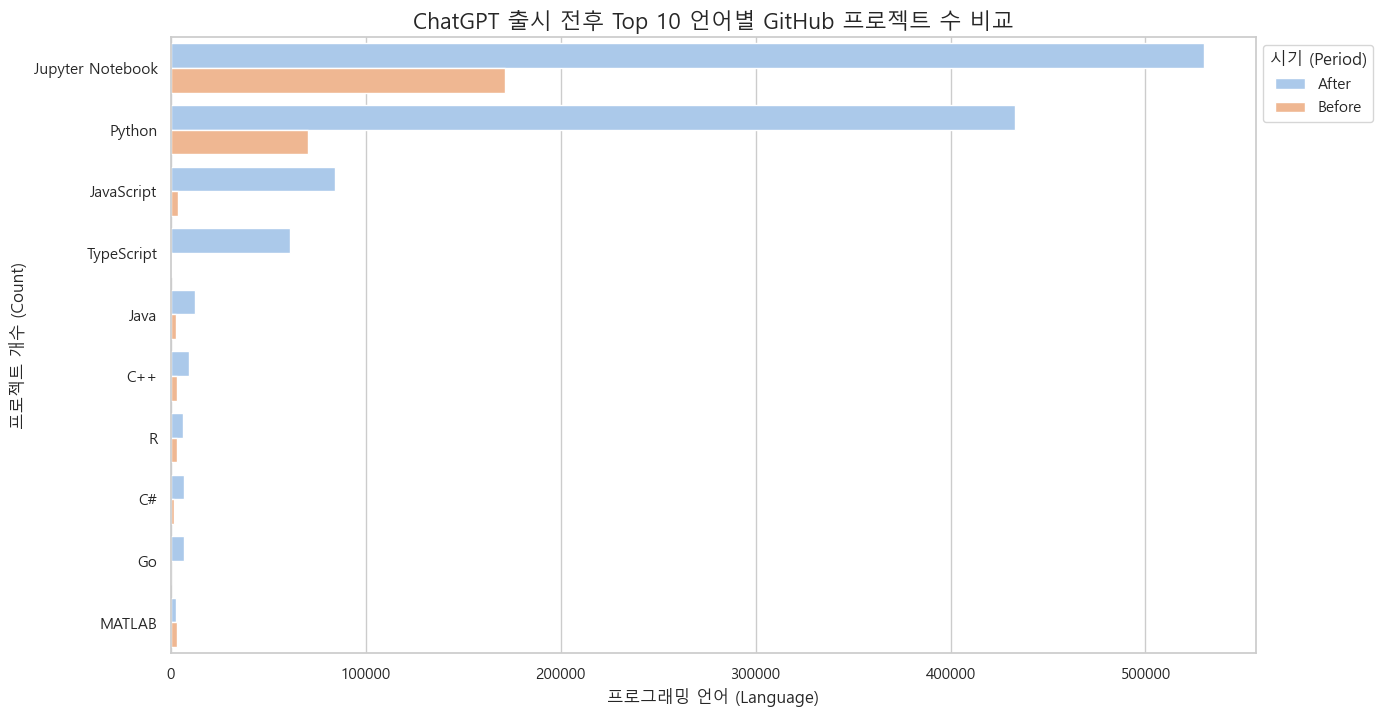

In [96]:
plt.figure(figsize=(14, 8))

# 'language' 순서를 'count' 기준으로 정렬하기 (옵션: 더 보기 좋음)
# (전체 'count'를 기준으로 정렬)
lang_order = df_top10_lang['language'].value_counts().index

sns.barplot(
    data=grouped_lang_df,
    x='count',     
    y='language',       
    hue='period',  
    order=lang_order    
)

plt.title('ChatGPT 출시 전후 Top 10 언어별 GitHub 프로젝트 수 비교', fontsize=16)
plt.xlabel('프로그래밍 언어 (Language)', fontsize=12)
plt.ylabel('프로젝트 개수 (Count)', fontsize=12)
plt.legend(
        title='시기 (Period)',
        loc='upper left',
        bbox_to_anchor=(1, 1)
)

plt.show()